Load data fromkeras.datasets and perform following computational analysis:- [CO3] (a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

(f) Evaluate Model’s accuracy




In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import imdb
vocab_size = 10000
maxlen = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2)
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 173s 539ms/step - accuracy: 0.6867 - loss: 0.5586 - val_accuracy: 0.8336 - val_loss: 0.3739
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8291 - loss: 0.3867
Test Loss: 0.3793143033981323
Test Accuracy: 0.8338000178337097


Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets.


Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 366ms/step - accuracy: 0.6753 - loss: 0.5663 - val_accuracy: 0.8442 - val_loss: 0.3617
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 362ms/step - accuracy: 0.8940 - loss: 0.2669 - val_accuracy: 0.8410 - val_loss: 0.3651
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8402 - loss: 0.3684
LSTM Model Accuracy: 0.8422
Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 377ms/step - accuracy: 0.6006 - loss: 0.6550 - val_accuracy: 0.8040 - val_loss: 0.4192
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 378ms/step - accuracy: 0.8602 - loss: 0.3364 - val_accuracy: 0.8402 - val_loss: 0.3644
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.8383 - loss: 0.3676
GRU Model Accuracy: 0.8393


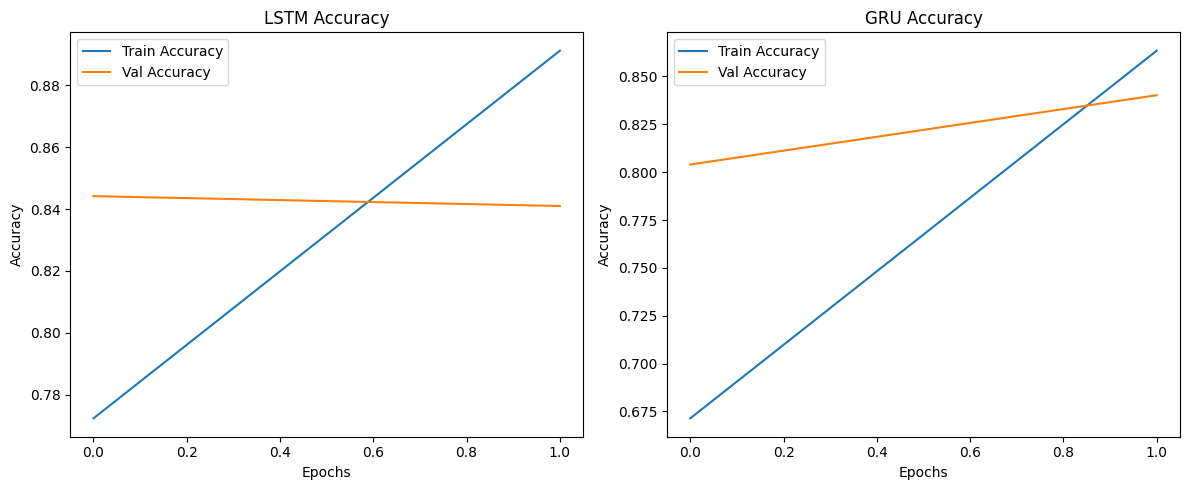

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

max_words = 10000
maxlen = 100

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Val Accuracy')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gru_history.history['accuracy'], label='Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='Val Accuracy')
plt.title('GRU Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
